

##Mounting at gdrive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls

gdrive	sample_data


In [4]:
cd /content/gdrive/MyDrive/praxis

/content/gdrive/MyDrive/praxis


In [5]:
!ls

 Asteroid_Updated.csv  "'n_obs_used',.ipynb"


##Importing Dataset

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('Asteroid_Updated.csv')    #importing dataset into object'data'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##Getting a rough understanding of the data provided

In [8]:
noOfRows, noOfCol = data.shape
print("No of rows : "+ str(noOfRows))
print("No of columns "+ str(noOfCol))

No of rows : 839714
No of columns 31


In [9]:
data.head() #Here we observe the data type inconsistency and values 

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [10]:
data.tail() #We notice that a lot of data is missing

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134
839713,NaN,2.546442,0.287672,5.356238,70.709555,273.483265,1.813901,3.278983,4.063580,11.0,9,11,17.406,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.815280,MBA,0.242551,1484.222588,20.432959


In [11]:
data.info() #Observe the non null count and the varrying datatype of values that the column contains

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

We find that there is a lot of missing data. We also find that diameter needs to be converted to float format. Along with that, we also need to change categorical variables to integer format

In [12]:
data.describe() #Getting an idea about the uniformity of the distribution and the difference between mimimum, maximum and mean values.

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,837025.000000,136409.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,16.786249,0.130067,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,1.821574,0.109994,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


The descriptions gives us a brief understanding about the data and it's distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f562b555210>,
      dtype=object)

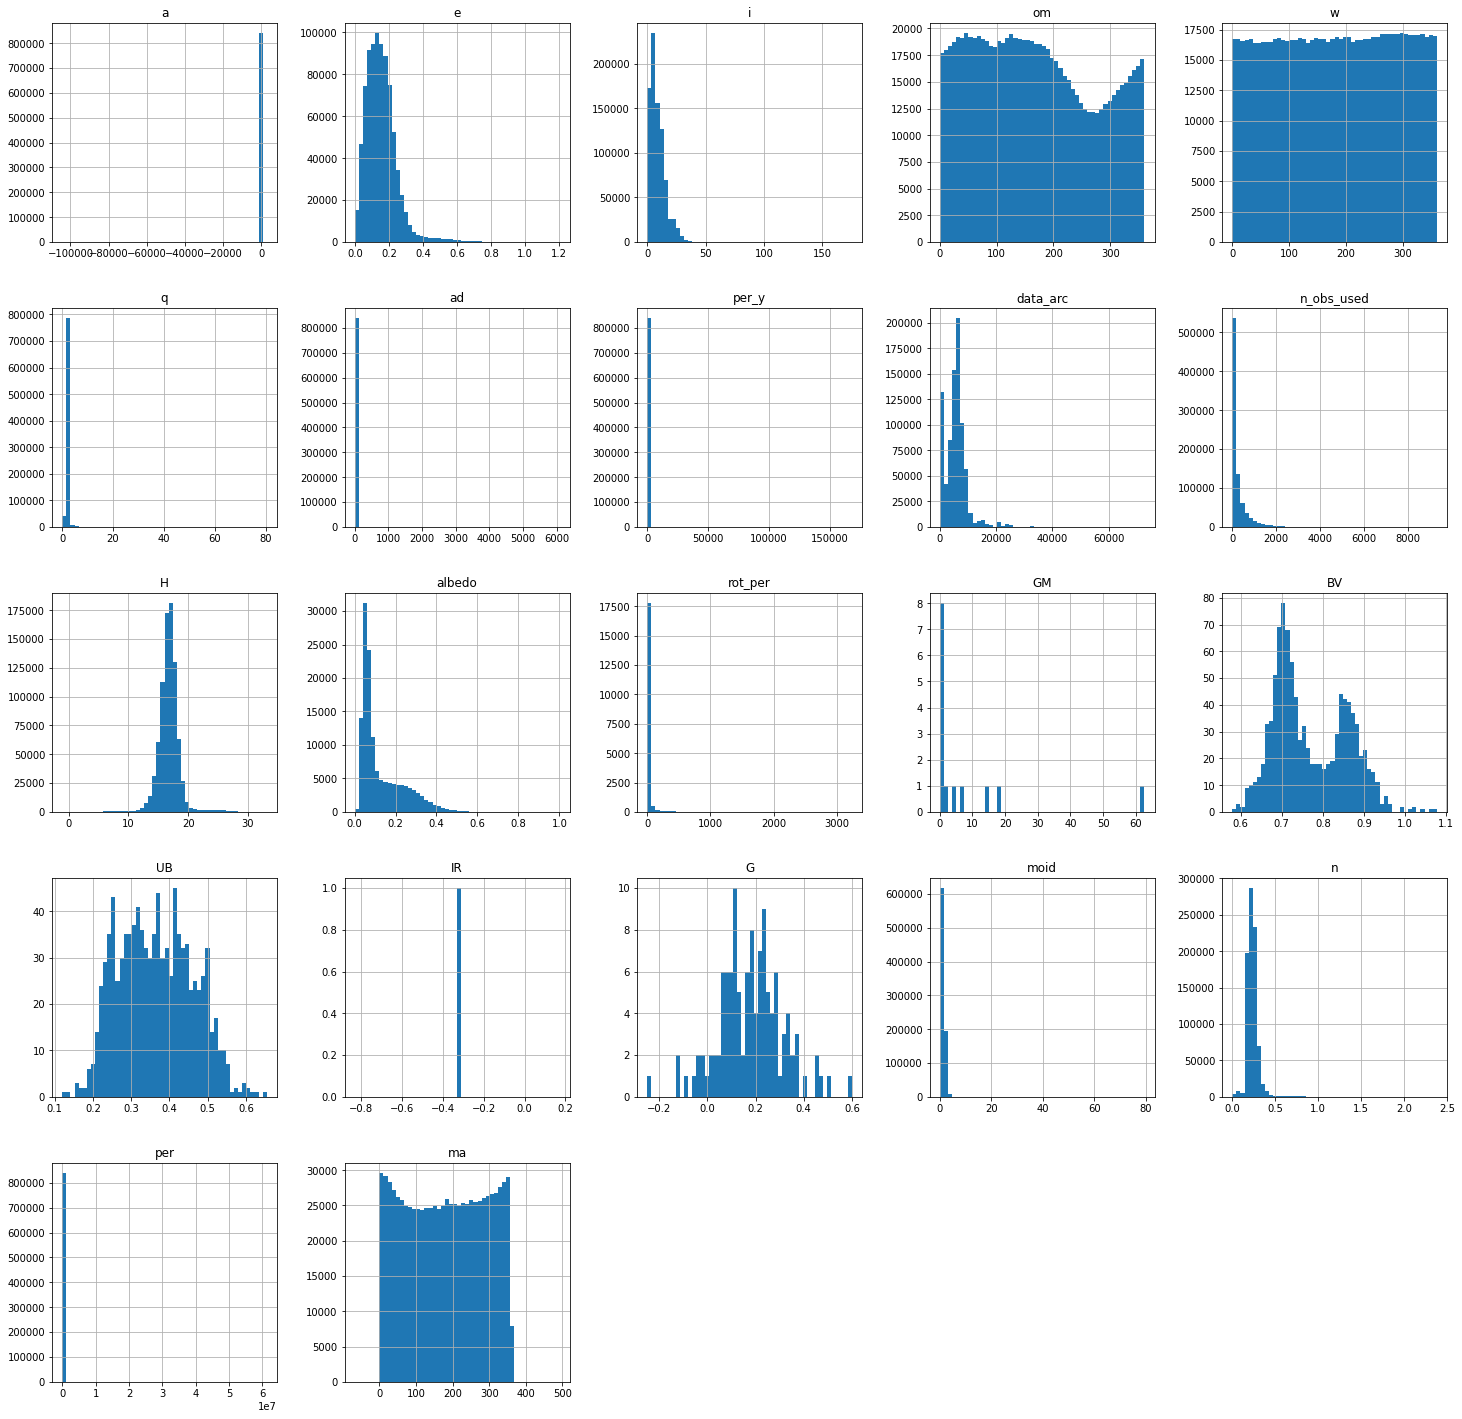

In [13]:
data.hist(bins = 50, figsize = (25,25))

We use graphs to better understand the data, but don't find the histogram for diamater, that's bec it's not in float datatype yet, thus, in the next step we do the conversion.

In [14]:
converttofloat = {'diameter' : float}
data = data.astype(converttofloat) 

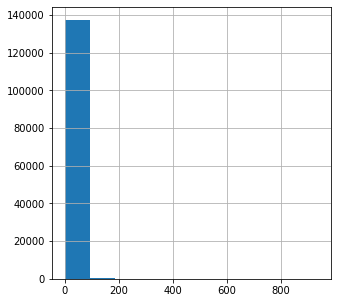

In [15]:
data['diameter'].hist( figsize = (5,5))

In [16]:
data['diameter'].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

In [17]:
data['diameter'].median()

3.9560000000000004

The above two cells give us insights about the diameter. There's a large difference between the min and max value, and the mean or meadian don't do justice to all values of diameter. Thus, we will be dropping values instead of replacing them with the mean or median

##Understanding variables and Choosing a Target parameter

In [18]:
'''
name - Asteroid's name
a -	semi-major axis[au] - half of the longest diameter of an ellipse.
e	- eccentricity - determines the amount by which its orbit around another body deviates from a perfect circle
i	- inclination wrt x-y ecliptic plane [deg]
om - longitude of the ascending node (angle from a specified reference direction, called the origin of longitude, to the direction of the ascending node)
w	- argument of perihelion -  angle from the body's ascending node to its periapsis
q	- perihelion (closest to sun) distance [au] - P=a(1−e) 
ad -	aphelion (farthest from sun) distance [au] - A=a(1+e) 
per_y	- orbital period [years]
data_arc	- data arc-span [d] (time span between earliest and latest observation)
condition_code	- orbit condition code (how well the orbit is known, 0- most well known, 9-least well known)
n_obs_used -	number of observations used
H - 	absolute magnitude parameter (apparent magnitude that the object would have if it were viewed from a distance of exactly 10 parsecs )
neo -	near earth object
pha -	physically hazardous asteroid 
diameter - 	diameter of asteroid [km]
extent -	object bi or tri-axial ellipsoid dimensions [km]
albedo - 	geometric albedo (the ratio of actual brightness as seen from the light source to that of an idealized flat, fully reflecting, diffusively scattering disk with the same cross-section.)
rot_per -	rotational period
gm -  (standard gravitational parameter) product of Gravitational constant and asteroid's mass (https://meetingorganizer.copernicus.org/EPSC-DPS2019/EPSC-DPS2019-1485-3.pdf) 
bv -	color index B-V magnitude difference -smaller, blue, hot
ub -	color index U-B magnitude difference 
IR -	color index I-R magnitude difference
spec_B - 	spectral taxonomic type (SMASSII)
spec_T -	spectral taxonomic type (Tholen)
G - Magnitude slope parameter
moid -	earth minimum orbit intersection distance [au]  (the distance between the closest points of the osculating orbits of two bodies)
class - classes of asteroid
n-  rotation axis orientation (https://issfd.org/ISSFD_1999/pdf/ODY_4.pdf) 
'''



"\nname - Asteroid's name\na -\tsemi-major axis[au] - half of the longest diameter of an ellipse.\ne\t- eccentricity - determines the amount by which its orbit around another body deviates from a perfect circle\ni\t- inclination wrt x-y ecliptic plane [deg]\nom - longitude of the ascending node (angle from a specified reference direction, called the origin of longitude, to the direction of the ascending node)\nw\t- argument of perihelion -  angle from the body's ascending node to its periapsis\nq\t- perihelion (closest to sun) distance [au] - P=a(1−e) \nad -\taphelion (farthest from sun) distance [au] - A=a(1+e) \nper_y\t- orbital period [years]\ndata_arc\t- data arc-span [d] (time span between earliest and latest observation)\ncondition_code\t- orbit condition code (how well the orbit is known, 0- most well known, 9-least well known)\nn_obs_used -\tnumber of observations used\nH - \tabsolute magnitude parameter (apparent magnitude that the object would have if it were viewed from a di

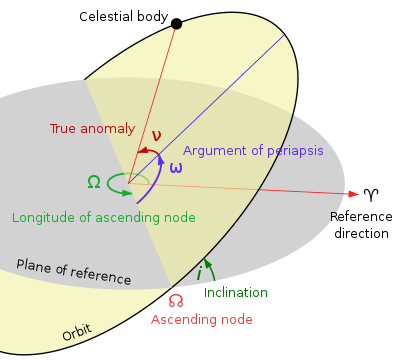

##Target Parameter - Diameter

Our main task is to predict and caliber the magnitude of asteroids. To do that, we have to choose a target parameter, for the estimation of which, we'll test various ML Models. After going through the data provided and understanding the task and the significance of each variable, it is understood that the diameter poses as one of the most significant parameters. The magnitude of the diameter demonstrates the magnitude of the asteroids. It is also directly related to many other parameters like the semi-major axis (a), absolute magnitude (H),  albedo, and more. Moreover, it can also be used to tell if an asteroid is a potentially hazardous one or not.

Thus, the target parameter chosen - Diameter

##Checking correlation between data variables

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

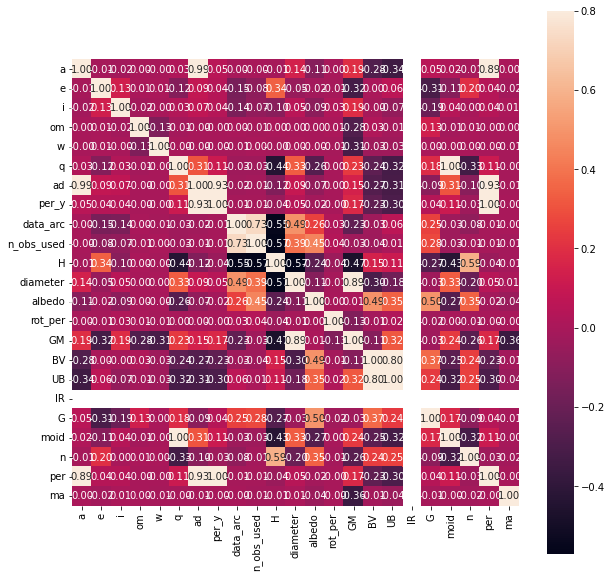

In [20]:
corrmat =  data.corr()
f, ax =  plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True, annot=True, fmt='.2f');
plt.show()

The correlation matrix don't give us many good insights as the data is unclean. But we find some uncanny behaviour in the IR row and column and also see that some columns have high multicolinearity. We'll be dealing with that after cleaning our data







##Preparing the dataset

This includes cleaning and transforming raw data into useful information for further analysis and processing

In this step we clean, prepare the dataset by handling missing values and substituting particular values whenever needed.


####HANDLING MISSING VALUES

In [21]:
missing_values_count = data.isnull().sum()
print(missing_values_count.sort_values())

e                      0
i                      0
om                     0
w                      0
q                      0
class                  0
n_obs_used             0
per_y                  1
a                      2
n                      2
ad                     6
neo                    6
per                    6
ma                     8
condition_code       867
H                   2689
data_arc           15474
pha                16442
moid               16442
diameter          702078
albedo            703305
name              817747
rot_per           820918
spec_B            838048
BV                838693
spec_T            838734
UB                838735
G                 839595
extent            839696
GM                839700
IR                839713
dtype: int64


A lot of our data is missing. Let's find what percentage is, to get a better understanding.

In [22]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(str(percent_missing)+" percent of our data is missing.")

37.681443305543276 percent of our data is missing.


So, let's check ten unique values from each column

In [23]:
for column in data.columns:
    print(column, data[column].unique()[:10])

name ['Ceres' 'Pallas' 'Juno' 'Vesta' 'Astraea' 'Hebe' 'Iris' 'Flora' 'Metis'
 'Hygiea']
a [2.76916515 2.77246592 2.66914952 2.3614179  2.57424892 2.42515999
 2.38533381 2.20176419 2.38563654 3.14153918]
e [0.07600903 0.23033682 0.25694232 0.08872146 0.19109451 0.20300711
 0.23120579 0.15649925 0.12311427 0.11246066]
i [10.59406704 34.83623442 12.98891913  7.14177081  5.36698822 14.7379011
  5.52365139  5.88695456  5.57681551  3.83156003]
om [ 80.30553157 173.08006275 169.85275981 103.81080443 141.57660464
 138.64020276 259.56323069 110.88932989  68.9085767  283.20216686]
w [ 73.59769412 310.04885743 248.13862618 150.72854129 358.68760727
 239.80749023 145.26510583 285.28746222   6.41736923 312.31520625]
q [2.5586836  2.13386493 1.98333205 2.15190945 2.08232409 1.93283527
 1.83383082 1.85718974 2.09193063 2.78823962]
ad [2.97964671 3.41106691 3.35496699 2.57092634 3.06617375 2.91748471
 2.93683681 2.54633864 2.67934244 3.49483874]
per_y [4.6082018  4.61644353 4.36081392 3.62883714 4.13

In [24]:
data.corr()['diameter'].abs().sort_values(ascending=False)

diameter      1.000000
GM            0.888500
H             0.568655
data_arc      0.491603
n_obs_used    0.385747
moid          0.332423
q             0.329703
BV            0.303947
n             0.201023
UB            0.175921
a             0.144736
albedo        0.107397
ad            0.093430
i             0.052609
e             0.049133
per           0.048953
per_y         0.048953
G             0.031286
ma            0.009659
rot_per       0.005480
w             0.002966
om            0.001164
IR                 NaN
Name: diameter, dtype: float64

The above cell's output show the corelation of other values with the values of diameter. Thus, we must make sure to include diameter, GM, H, data_arc, n_obs_used, moid, q, BV and n, UB and a in our model

Before that, let's drop some missing values

In [25]:
data1 = data

In [26]:
data1.dropna()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma


We can't drop all missing values because then we'll lose all our data.

So, let's try dropping columns with more than 1 missing value

In [27]:
data

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,N,939.400,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,N,545.000,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,N,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [28]:
data1 = data

In [29]:
data=data1

In [30]:
print(missing_values_count.sort_values())

e                      0
i                      0
om                     0
w                      0
q                      0
class                  0
n_obs_used             0
per_y                  1
a                      2
n                      2
ad                     6
neo                    6
per                    6
ma                     8
condition_code       867
H                   2689
data_arc           15474
pha                16442
moid               16442
diameter          702078
albedo            703305
name              817747
rot_per           820918
spec_B            838048
BV                838693
spec_T            838734
UB                838735
G                 839595
extent            839696
GM                839700
IR                839713
dtype: int64


In [31]:
columns_without_na = data1.dropna(axis=1)
columns_without_na.head()

,e,i,om,w,q,n_obs_used,class
0,0.076009,10.594067,80.305532,73.597694,2.558684,1002,MBA
1,0.230337,34.836234,173.080063,310.048857,2.133865,8490,MBA
2,0.256942,12.988919,169.852760,248.138626,1.983332,7104,MBA
3,0.088721,7.141771,103.810804,150.728541,2.151909,9325,MBA
4,0.191095,5.366988,141.576605,358.687607,2.082324,2916,MBA


In [32]:
print("Columns in original dataset: %d \n" % data.shape[1])
print("Columns with na's dropped: %d" % columns_without_na.shape[1])

Columns in original dataset: 31 

Columns with na's dropped: 7


But this way we lose most of our important data. So, let's manually remove columns that we can drop.

In [33]:
data.drop(['ad','i','e','per','per_y','G','ma','rot_per','w','om','IR'], axis=1, inplace=True)

We could remove na values now but but we have only 14 non null GM values, 1021 BV values and 979 UB values. So, let's understand these data.

In [34]:
data['GM'].describe()

count    1.400000e+01
mean     7.821928e+00
std      1.678880e+01
min      2.100000e-09
25%      1.022225e-03
50%      6.192500e-01
75%      6.500000e+00
max      6.262840e+01
Name: GM, dtype: float64

In [35]:
data['BV'].describe()

count    1021.000000
mean        0.769212
std         0.088625
min         0.580000
25%         0.700000
50%         0.743000
75%         0.850000
max         1.077000
Name: BV, dtype: float64

In [36]:
data['UB'].describe()

count    979.000000
mean       0.364396
std        0.095780
min        0.120000
25%        0.289000
50%        0.360000
75%        0.439000
max        0.655000
Name: UB, dtype: float64

The data looks quite uniform, thus we'll fill missing values of these columns with the mean.

In [37]:
data['GM'] = data['GM'].fillna((data['GM'].mean()))

In [38]:
data['BV'] = data['BV'].fillna((data['BV'].mean()))

In [39]:
data['UB'] = data['UB'].fillna((data['UB'].mean()))

In [40]:
data

,name,a,q,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,GM,BV,UB,spec_B,spec_T,moid,class,n
0,Ceres,2.769165,2.558684,8822.0,0,1002,3.340,N,N,939.400,964.4 x 964.2 x 891.8,0.0900,62.628400,0.713000,0.426000,C,G,1.594780,MBA,0.213885
1,Pallas,2.772466,2.133865,72318.0,0,8490,4.130,N,N,545.000,582x556x500,0.1010,14.300000,0.635000,0.284000,B,B,1.233240,MBA,0.213503
2,Juno,2.669150,1.983332,72684.0,0,7104,5.330,N,N,246.596,NaN,0.2140,7.821928,0.824000,0.433000,Sk,S,1.034540,MBA,0.226019
3,Vesta,2.361418,2.151909,24288.0,0,9325,3.200,N,N,525.400,572.6 x 557.2 x 446.4,0.4228,17.800000,0.782000,0.492000,V,V,1.139480,MBA,0.271609
4,Astraea,2.574249,2.082324,63507.0,0,2916,6.850,N,N,106.699,NaN,0.2740,7.821928,0.826000,0.411000,S,S,1.095890,MBA,0.238632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.943214,17298.0,0,118,20.400,Y,Y,NaN,NaN,NaN,7.821928,0.769212,0.364396,NaN,NaN,0.032397,APO,0.208911
839710,NaN,2.645238,1.959126,16.0,9,15,17.507,N,N,NaN,NaN,NaN,7.821928,0.769212,0.364396,NaN,NaN,0.956145,MBA,0.229090
839711,NaN,2.373137,1.893638,5.0,9,6,18.071,N,N,NaN,NaN,NaN,7.821928,0.769212,0.364396,NaN,NaN,0.893896,MBA,0.269600
839712,NaN,2.260404,1.676433,10.0,9,13,18.060,N,N,NaN,NaN,NaN,7.821928,0.769212,0.364396,NaN,NaN,0.680220,MBA,0.290018


Now, let's drop columns of non-numeric type

In [41]:
data.drop(['name','condition_code','neo','extent','spec_B','spec_T','class'], axis=1, inplace=True)

We dropped features like name, condition_code, neo and more because the asteroid's name or, where the asteroid lies or, whether it is near earth or not or, the taxonomy has nothing to do with the diameter.<br>


In [42]:
data

,a,q,data_arc,n_obs_used,H,pha,diameter,albedo,GM,BV,UB,moid,n
0,2.769165,2.558684,8822.0,1002,3.340,N,939.400,0.0900,62.628400,0.713000,0.426000,1.594780,0.213885
1,2.772466,2.133865,72318.0,8490,4.130,N,545.000,0.1010,14.300000,0.635000,0.284000,1.233240,0.213503
2,2.669150,1.983332,72684.0,7104,5.330,N,246.596,0.2140,7.821928,0.824000,0.433000,1.034540,0.226019
3,2.361418,2.151909,24288.0,9325,3.200,N,525.400,0.4228,17.800000,0.782000,0.492000,1.139480,0.271609
4,2.574249,2.082324,63507.0,2916,6.850,N,106.699,0.2740,7.821928,0.826000,0.411000,1.095890,0.238632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.943214,17298.0,118,20.400,Y,NaN,NaN,7.821928,0.769212,0.364396,0.032397,0.208911
839710,2.645238,1.959126,16.0,15,17.507,N,NaN,NaN,7.821928,0.769212,0.364396,0.956145,0.229090
839711,2.373137,1.893638,5.0,6,18.071,N,NaN,NaN,7.821928,0.769212,0.364396,0.893896,0.269600
839712,2.260404,1.676433,10.0,13,18.060,N,NaN,NaN,7.821928,0.769212,0.364396,0.680220,0.290018


In [43]:
data = data.dropna(subset=['BV','diameter','H', 'albedo','data_arc']) #dropping records with these as Nan

In [44]:
data.isna().values.any() #Checking if there are null values

False

In [45]:
data

,a,q,data_arc,n_obs_used,H,pha,diameter,albedo,GM,BV,UB,moid,n
0,2.769165,2.558684,8822.0,1002,3.34,N,939.400,0.0900,62.628400,0.713000,0.426000,1.594780,0.213885
1,2.772466,2.133865,72318.0,8490,4.13,N,545.000,0.1010,14.300000,0.635000,0.284000,1.233240,0.213503
2,2.669150,1.983332,72684.0,7104,5.33,N,246.596,0.2140,7.821928,0.824000,0.433000,1.034540,0.226019
3,2.361418,2.151909,24288.0,9325,3.20,N,525.400,0.4228,17.800000,0.782000,0.492000,1.139480,0.271609
4,2.574249,2.082324,63507.0,2916,6.85,N,106.699,0.2740,7.821928,0.826000,0.411000,1.095890,0.238632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,1.797805,2250.0,47,18.20,N,1.077,0.1160,7.821928,0.769212,0.364396,0.854315,0.175794
797860,3.171225,2.666623,2373.0,50,16.20,N,3.793,0.0210,7.821928,0.769212,0.364396,1.663010,0.174527
798077,2.548410,2.354549,3297.0,33,17.30,N,2.696,0.0610,7.821928,0.769212,0.364396,1.367330,0.242270
799752,3.051336,2.174231,2208.0,27,17.20,N,3.271,0.0720,7.821928,0.769212,0.364396,1.166840,0.184914


In [46]:
print(data.isnull().sum()) #Checking how many null values are present

a             0
q             0
data_arc      0
n_obs_used    0
H             0
pha           0
diameter      0
albedo        0
GM            0
BV            0
UB            0
moid          0
n             0
dtype: int64


Since pha is the only column with categorical data, we need to convert it to int and perform categorical encoding.

In [47]:
pha_entries = data['pha'].unique()  #finding out unique data to encode
pha_entries.sort()
print(pha_entries)

['N' 'Y']


categorical encoding

In [48]:
cleanup_pha = {"pha": {"N": 0, "Y": 1, }}
data = data.replace(cleanup_pha) #replacing N by 0 and Y by 1
data.head()

,a,q,data_arc,n_obs_used,H,pha,diameter,albedo,GM,BV,UB,moid,n
0,2.769165,2.558684,8822.0,1002,3.34,0,939.400,0.0900,62.628400,0.713,0.426,1.59478,0.213885
1,2.772466,2.133865,72318.0,8490,4.13,0,545.000,0.1010,14.300000,0.635,0.284,1.23324,0.213503
2,2.669150,1.983332,72684.0,7104,5.33,0,246.596,0.2140,7.821928,0.824,0.433,1.03454,0.226019
3,2.361418,2.151909,24288.0,9325,3.20,0,525.400,0.4228,17.800000,0.782,0.492,1.13948,0.271609
4,2.574249,2.082324,63507.0,2916,6.85,0,106.699,0.2740,7.821928,0.826,0.411,1.09589,0.238632


In [49]:
data.info() #checking if any more conversion is required

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136005 entries, 0 to 810375
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           136005 non-null  float64
 1   q           136005 non-null  float64
 2   data_arc    136005 non-null  float64
 3   n_obs_used  136005 non-null  int64  
 4   H           136005 non-null  float64
 5   pha         136005 non-null  int64  
 6   diameter    136005 non-null  float64
 7   albedo      136005 non-null  float64
 8   GM          136005 non-null  float64
 9   BV          136005 non-null  float64
 10  UB          136005 non-null  float64
 11  moid        136005 non-null  float64
 12  n           136005 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 14.5 MB


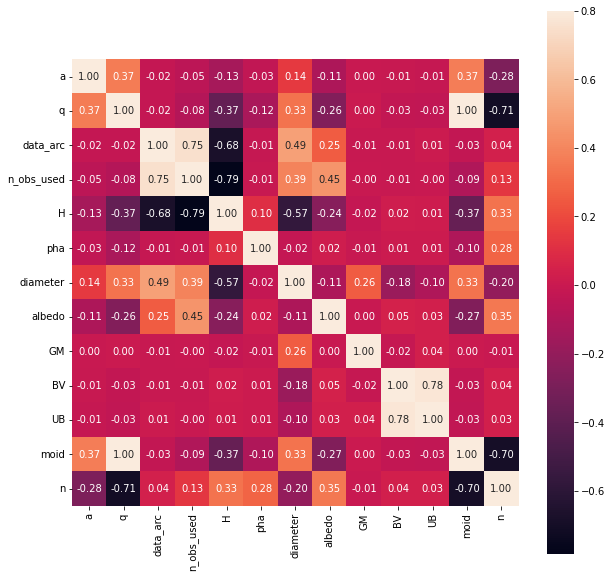

In [50]:
#checking the correlation heatmap to gain some insight on the now clean data
corrmat =  data.corr()
f, ax =  plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True, annot=True, fmt='.2f');
plt.show()

Analzying from the heatmap matrix, we deicde to drop n_obs_used and data_arc

In [51]:
data.drop(['n_obs_used'], axis=1, inplace=True)

In [52]:
data

,a,q,data_arc,H,pha,diameter,albedo,GM,BV,UB,moid,n
0,2.769165,2.558684,8822.0,3.34,0,939.400,0.0900,62.628400,0.713000,0.426000,1.594780,0.213885
1,2.772466,2.133865,72318.0,4.13,0,545.000,0.1010,14.300000,0.635000,0.284000,1.233240,0.213503
2,2.669150,1.983332,72684.0,5.33,0,246.596,0.2140,7.821928,0.824000,0.433000,1.034540,0.226019
3,2.361418,2.151909,24288.0,3.20,0,525.400,0.4228,17.800000,0.782000,0.492000,1.139480,0.271609
4,2.574249,2.082324,63507.0,6.85,0,106.699,0.2740,7.821928,0.826000,0.411000,1.095890,0.238632
...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,1.797805,2250.0,18.20,0,1.077,0.1160,7.821928,0.769212,0.364396,0.854315,0.175794
797860,3.171225,2.666623,2373.0,16.20,0,3.793,0.0210,7.821928,0.769212,0.364396,1.663010,0.174527
798077,2.548410,2.354549,3297.0,17.30,0,2.696,0.0610,7.821928,0.769212,0.364396,1.367330,0.242270
799752,3.051336,2.174231,2208.0,17.20,0,3.271,0.0720,7.821928,0.769212,0.364396,1.166840,0.184914


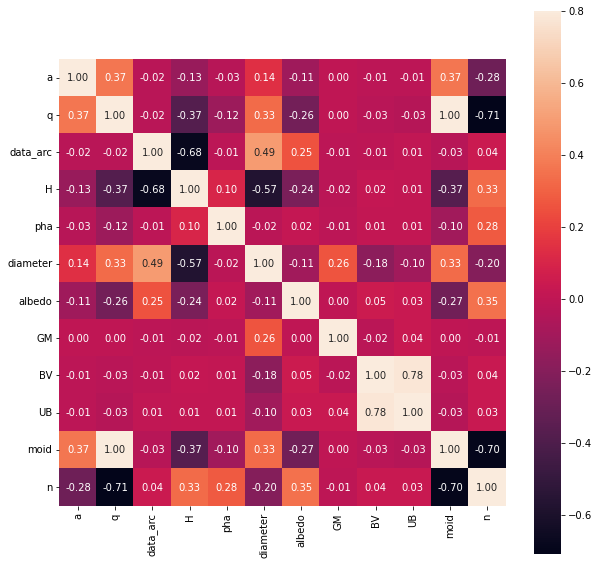

In [53]:
corrmat =  data.corr()
f, ax =  plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True, annot=True, fmt='.2f');
plt.show()

In [54]:
cleandata = data

##Splitting data into model features and the target

In [55]:
y = cleandata['diameter'] #target
X = cleandata.drop(['diameter'],axis = 1) #features

In [56]:
X = X.iloc[:,:].values
X.shape #checking the shape of the feature data

(136005, 11)

##Feature Scaling

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [58]:
transf = StandardScaler()
data = transf.fit_transform(data)
X_std = transf.fit_transform(X)

In [59]:
from pandas import DataFrame

In [60]:
dataset = DataFrame(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f560e808f90>,
      dtype=object)

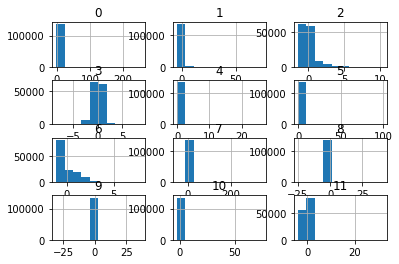

In [61]:
dataset.hist()

##Train- Test splitting of the data



In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 0)

##Tring different ML algorithms

In [63]:
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score         #to get the accuracy of each model

In [64]:
import seaborn as sns

def plot(prediction):   #For plotting prediction and visualizing how well the model is doing
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9,5)) 
    sns.distplot(Y_test.values,label='Test Values', ax=ax1)
    sns.distplot(prediction ,label='Prediction', ax=ax1)
    ax1.set_xlabel('Distribution Plot')
    ax2.scatter(Y_test,prediction, c='yellow',label='Predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale

algorithmsList=[]  #list that will contain all algorithm names
rmseList=[]        #list with the root mean squared error for each algorithm
modelScore=[]  #list with the R2 score of each model

####LINEAR REGRESSION

root mean square error : 6.612885651364122
R2 Score :  0.5922397256301632






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


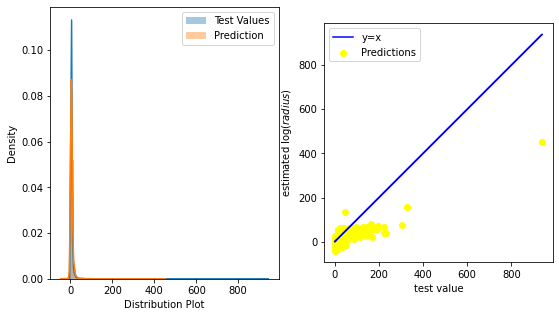

In [65]:
algorithmsList.append("Linear Regression")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

####DECISION TREE

root mean square error : 1.5005977963853847
R2 Score :  0.9790032781306461






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


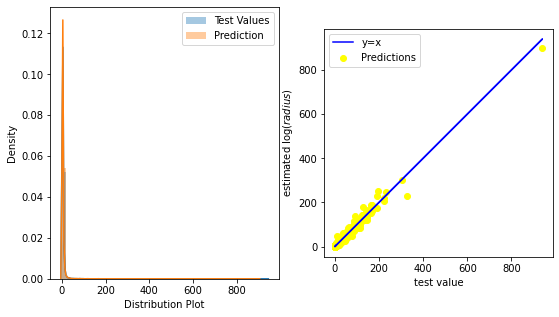

In [66]:
algorithmsList.append("Decision Tree")

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

####RANDOM FOREST





root mean square error : 2.859293390065279
R2 Score :  0.9237674710590428






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


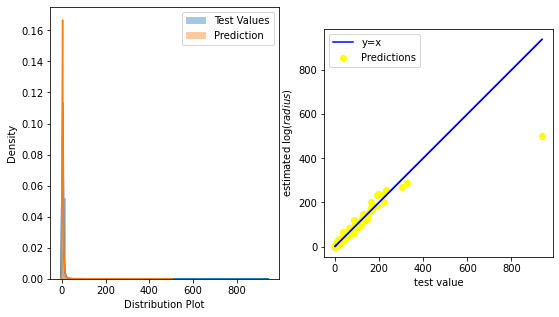

In [67]:
algorithmsList.append("Random Forest")

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

####ELASTIC NET CV

root mean square error : 7.204652576992108
R2 Score :  0.5159959754061155






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


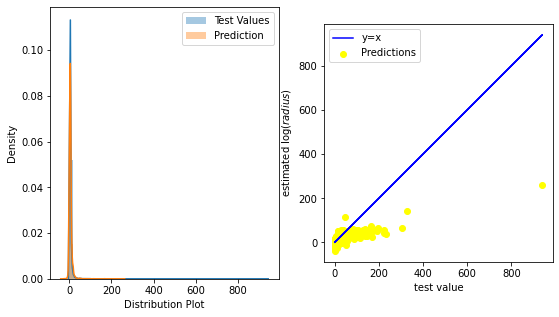

In [68]:
algorithmsList.append("Elastic Net CV")

from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###KNN

root mean square error : 5.108410921891511
R2 Score :  0.7566706274555269






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


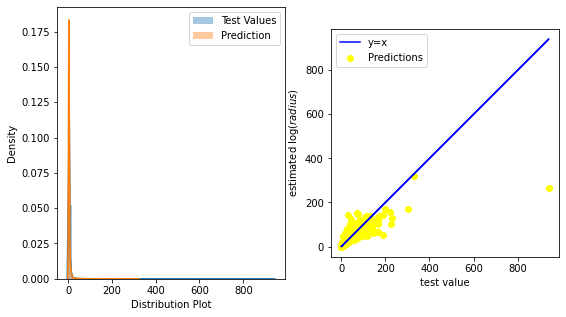

In [69]:
algorithmsList.append("KNN")

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                  
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###RIDGE

root mean square error : 6.612954434828743
R2 Score :  0.5922312430064647






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


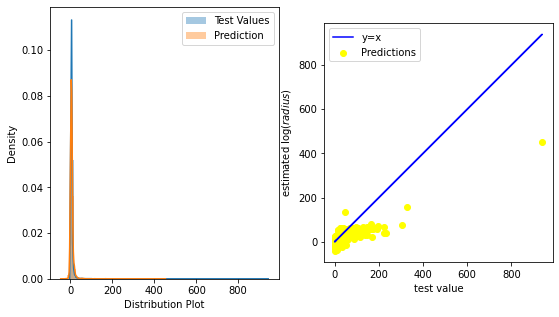

In [70]:
algorithmsList.append("Ridge")

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###MLP Regression

root mean square error : 8.54729177330212
R2 Score :  0.31879167688744114






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


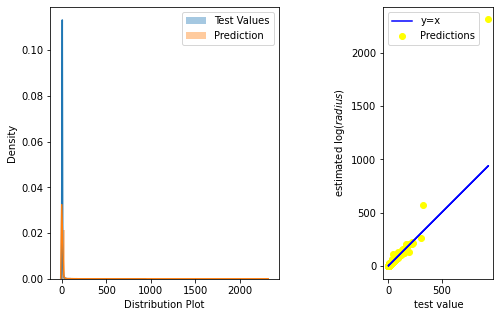

In [71]:
algorithmsList.append("MLP Regressor")

from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###Lasso

root mean square error : 7.222946833839137
R2 Score :  0.5135348613866848






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


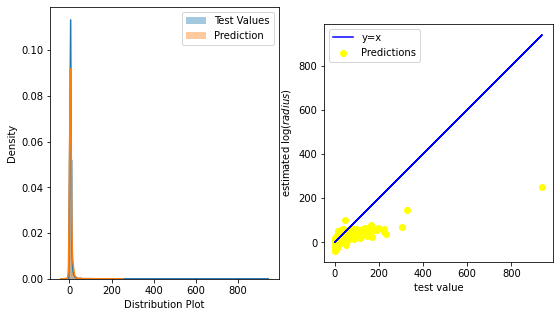

In [72]:
algorithmsList.append("Lasso")

from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###LGBM Regression

root mean square error : 4.508878987940813
R2 Score :  0.8104341747179395






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


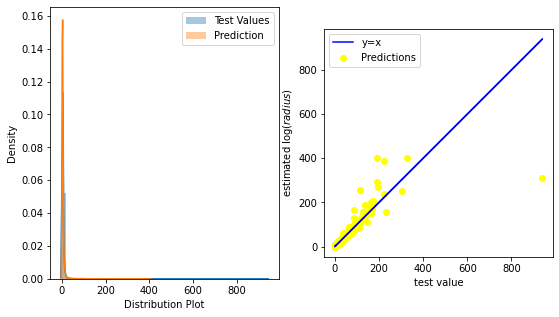

In [73]:
algorithmsList.append("LGBM")

from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###XGBoost

[06:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
root mean square error : 2.57801205958267
R2 Score :  0.9380283904567966






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


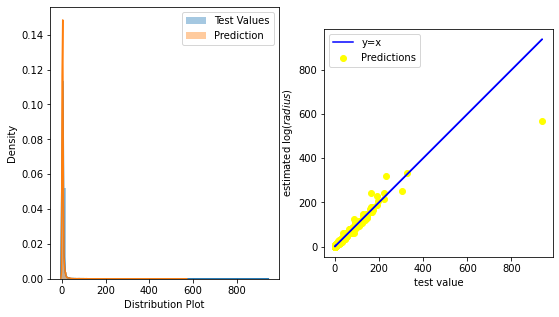

In [74]:
algorithmsList.append("XG Boost")

from xgboost.sklearn import XGBRegressor
model = XGBRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###CatBoost Regression

In [75]:
!pip3 install catboost

     |████████████████████████████████| 76.3 MB 18 kB/s 


Learning rate set to 0.085895
0:	learn: 8.5730841	total: 64.9ms	remaining: 1m 4s
1:	learn: 8.0163479	total: 81.1ms	remaining: 40.5s
2:	learn: 7.4835546	total: 96.5ms	remaining: 32.1s
3:	learn: 7.0149573	total: 111ms	remaining: 27.7s
4:	learn: 6.5990595	total: 127ms	remaining: 25.3s
5:	learn: 6.1963128	total: 142ms	remaining: 23.6s
6:	learn: 5.8226121	total: 158ms	remaining: 22.4s
7:	learn: 5.4880249	total: 177ms	remaining: 21.9s
8:	learn: 5.1675896	total: 192ms	remaining: 21.2s
9:	learn: 4.8895839	total: 207ms	remaining: 20.5s
10:	learn: 4.6115476	total: 222ms	remaining: 20s
11:	learn: 4.3799137	total: 237ms	remaining: 19.5s
12:	learn: 4.1639357	total: 252ms	remaining: 19.1s
13:	learn: 3.9497753	total: 267ms	remaining: 18.8s
14:	learn: 3.7667244	total: 283ms	remaining: 18.6s
15:	learn: 3.5894229	total: 298ms	remaining: 18.4s
16:	learn: 3.4309795	total: 312ms	remaining: 18.1s
17:	learn: 3.2893139	total: 328ms	remaining: 17.9s
18:	learn: 3.1481501	total: 348ms	remaining: 17.9s
19:	learn:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


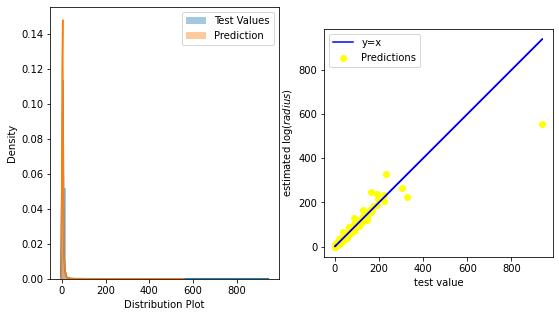

In [76]:
algorithmsList.append("CatBoost")

from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###Bayesian Ridge

root mean square error : 6.613354573624478
R2 Score :  0.5921818947046238






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


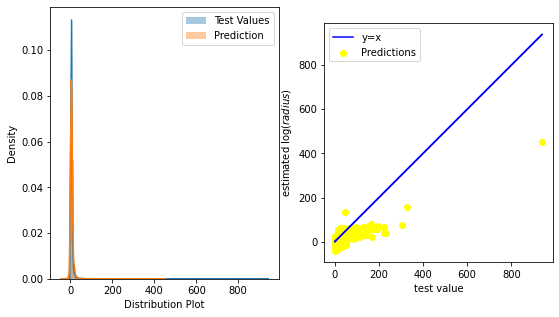

In [77]:
algorithmsList.append("Bayesian Ridge")

from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###Gradient Boosting 

root mean square error : 2.2915169442224825
R2 Score :  0.9510368857885992






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


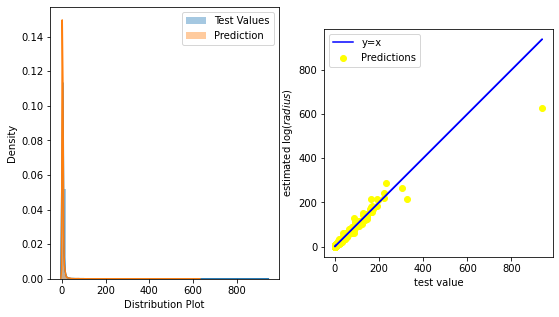

In [78]:
algorithmsList.append("Gradient Boosting")

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

###Support Vector Machine

root mean square error : 8.036758493457786
R2 Score :  0.3977390255895612






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


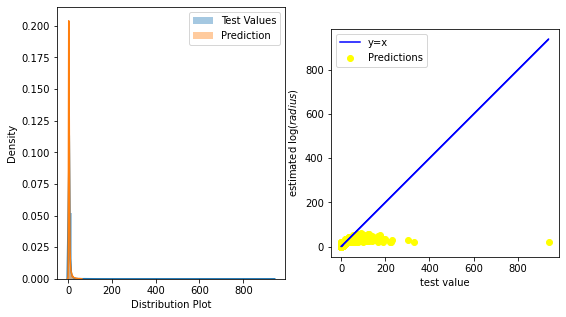

In [79]:
algorithmsList.append("Support Vector Machine")

from sklearn.svm import SVR
model = SVR()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

rmseList.append(rmse)

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)                     #This shows the score of how well the model has fit 
print("\n\n\n")

modelScore.append(r2)

plot(diameterPrediction)

##CONCLUSION

In [80]:
import matplotlib.pyplot as plt

In [81]:
len(modelScore)

14

In [82]:
len(algorithmsList)

14

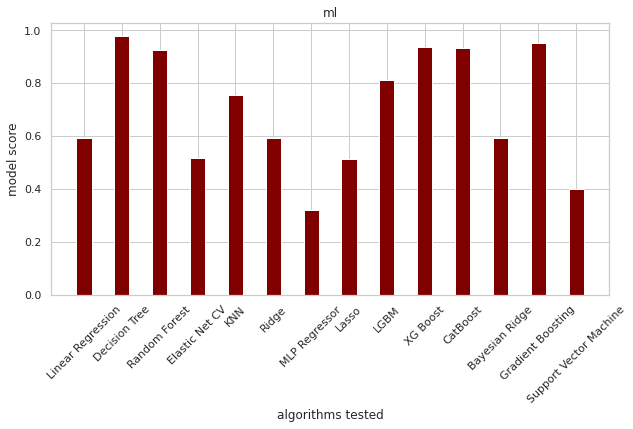

In [85]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algorithmsList, modelScore, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.xlabel("algorithms tested")
plt.ylabel("model score")
plt.title("ml")
plt.show()

###Conclusion
**Decision Tree Regression** with the score of 0.9790032781 shows the best performance.